In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Bengaluru_House_Data.csv'

In [ ]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [ ]:
df1.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns', inplace=True)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
df1 = df1.dropna()
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df1.shape

(13246, 5)

In [ ]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df1['BHK'] = df1['size'].apply(lambda x:int( x.split(' ')[0]))

In [ ]:
df1.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x) :
    try :
        float(x)
    except: 
        return False
    return True

In [ ]:
df1[~df1['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [ ]:
def convertRangeToNum(k):
    token = k.split('-')
    if len(token) == 2 :
        return (float(token[0]) + float(token[1]))/2
    try : 
        return float(k)
    except: 
        return None

In [ ]:
print(convertRangeToNum('2334'))

2334.0


In [ ]:
df = df1.copy()
df['total_sqft'] = df['total_sqft'].apply(convertRangeToNum)

In [ ]:
df.head(4)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3


In [ ]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

Dimensionality curse

In [ ]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
len(df.location)


13246

In [ ]:
df.location = df.location.apply(lambda x : x.strip())
df.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [ ]:
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [ ]:
len (location_stats[location_stats <= 10])

1052

In [ ]:
location_less_10 = location_stats[location_stats <= 10]
location_less_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [ ]:
len(df.location.unique())

1293

In [ ]:
df.location = df.location.apply(lambda x :'other' if x in location_less_10 else x )
df

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [ ]:
len(df.location.unique())

242

OUTLIER DETECTION AND REMOVAL

In [ ]:
df2 = df[~(df.total_sqft / df.BHK < 300)]
df2.shape

(12502, 7)

In [ ]:
df2.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
def remove_pps_outlier (df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st) )& (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df] , ignore_index=True)
    return df_out
        


In [ ]:
df3 = remove_pps_outlier(df2)
df3.shape

(10241, 7)

In [ ]:
df3.location

0        1st Block Jayanagar
1        1st Block Jayanagar
2        1st Block Jayanagar
3        1st Block Jayanagar
4        1st Block Jayanagar
                ...         
10236                  other
10237                  other
10238                  other
10239                  other
10240                  other
Name: location, Length: 10241, dtype: object

visualising the data

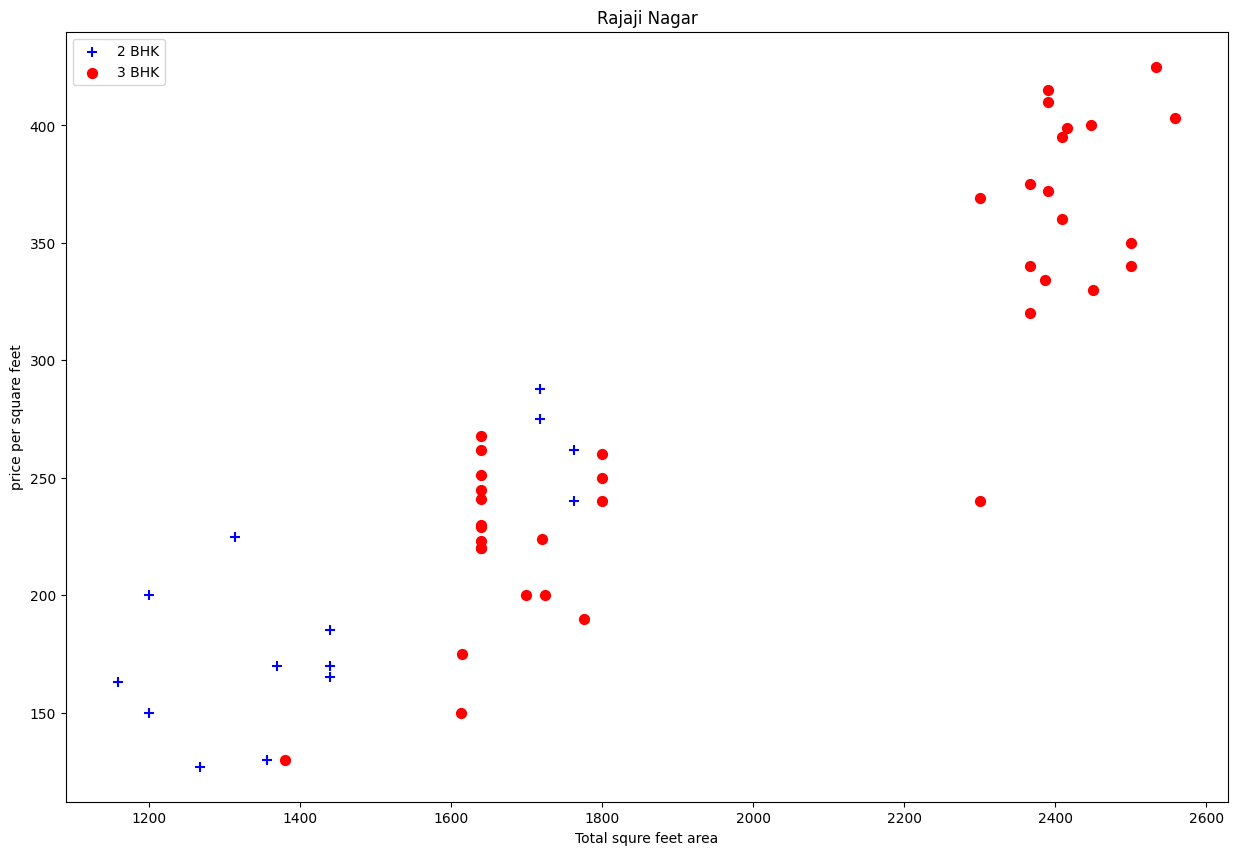

In [ ]:
def plot_scatter_chart (df, location): 
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'b' , label = '2 BHK' , s = 50, marker='+')
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'r' , label = '3 BHK' , s = 50, marker='o')
    plt.xlabel('Total squre feet area')
    plt.ylabel('price per square feet')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df3,'Rajaji Nagar')

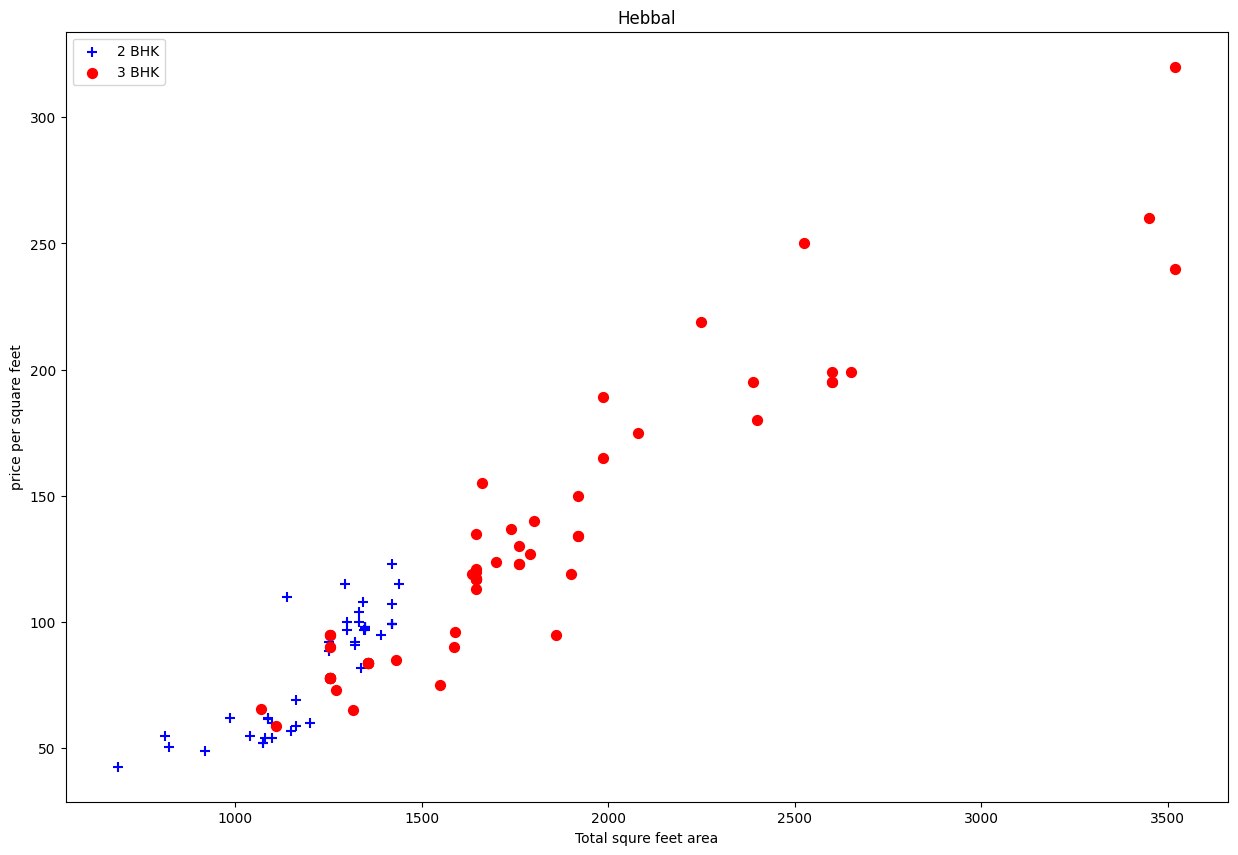

In [ ]:
plot_scatter_chart(df3, "Hebbal") 

after looking at the graph.. price of 2bhk  > 3bhk for same sqft for some data points

Data cleaning

In [ ]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk , bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]= {
                'mean' : np.mean(bhk_df.price_per_sqft), 
                'std' : np.std(bhk_df.price_per_sqft), 
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
                stats = bhk_stats.get(bhk-1)
                if stats and stats['count'] > 5:
                    exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices , axis = "index")

In [ ]:
df4 = remove_bhk_outlier(df3)
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


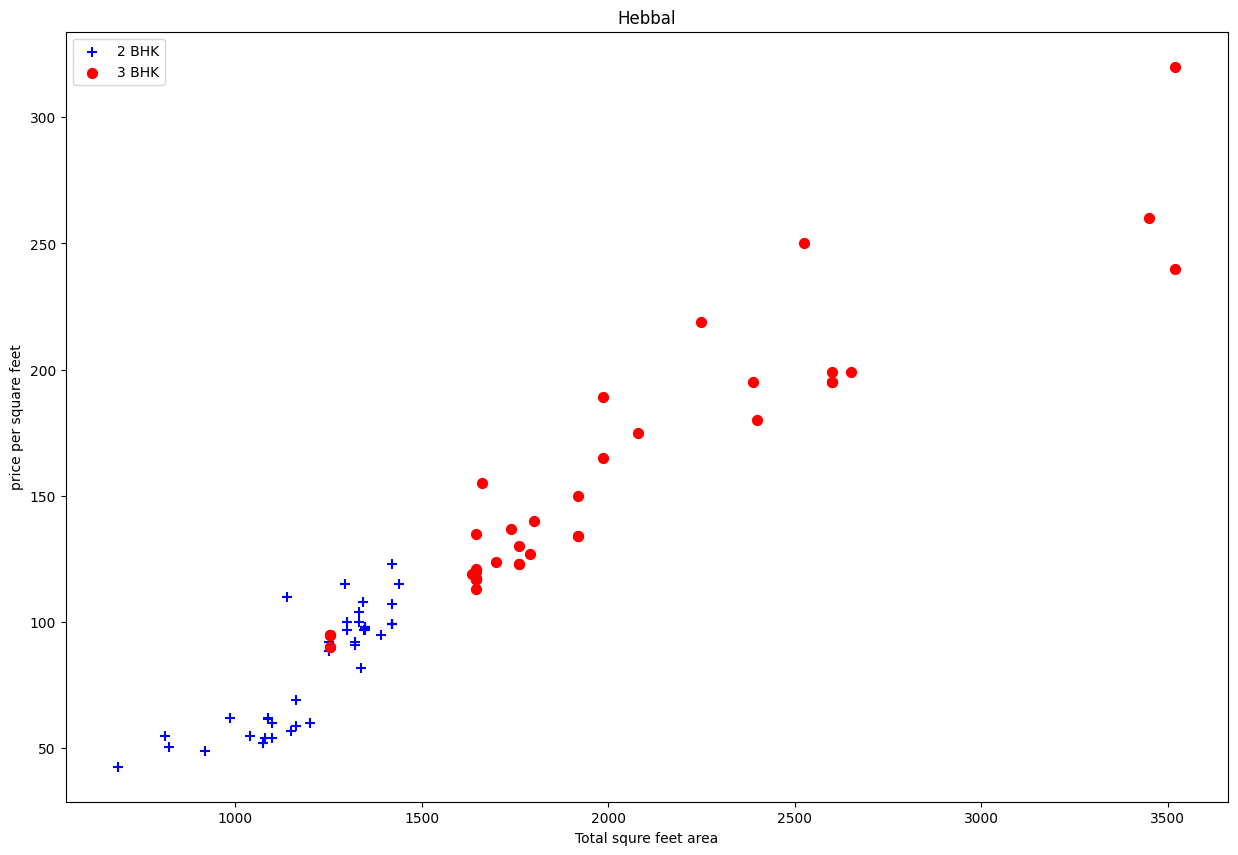

In [ ]:
plot_scatter_chart(df4, "Hebbal")

Text(0, 0.5, 'count')

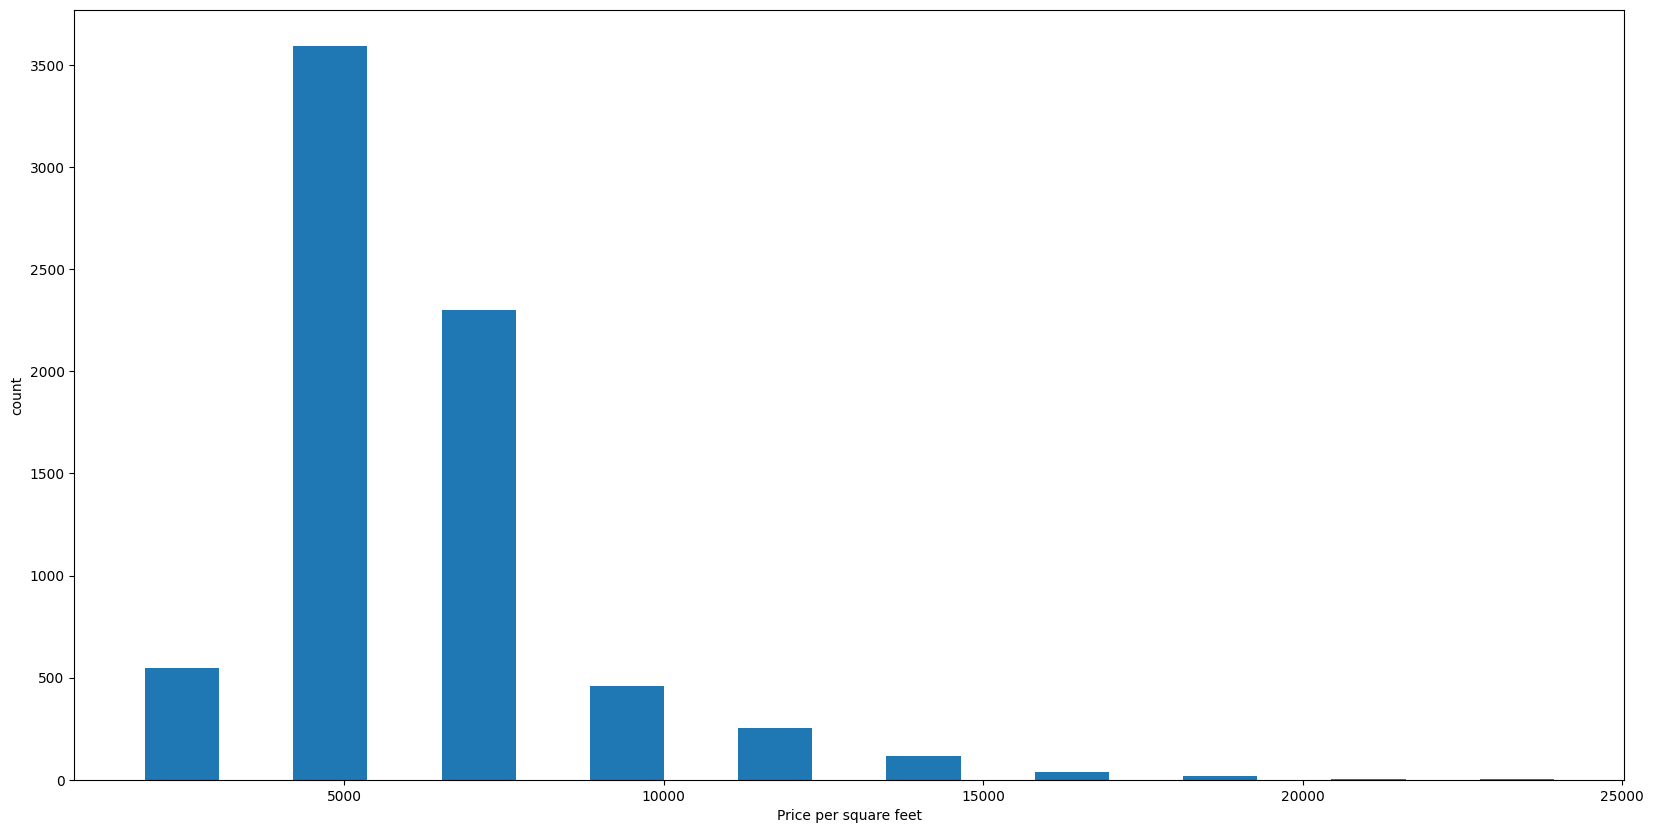

In [ ]:
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df4.price_per_sqft , rwidth= 0.5)
plt.xlabel('Price per square feet')
plt.ylabel('count')

In [ ]:
df4.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [ ]:
df4[df4.bath > 10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

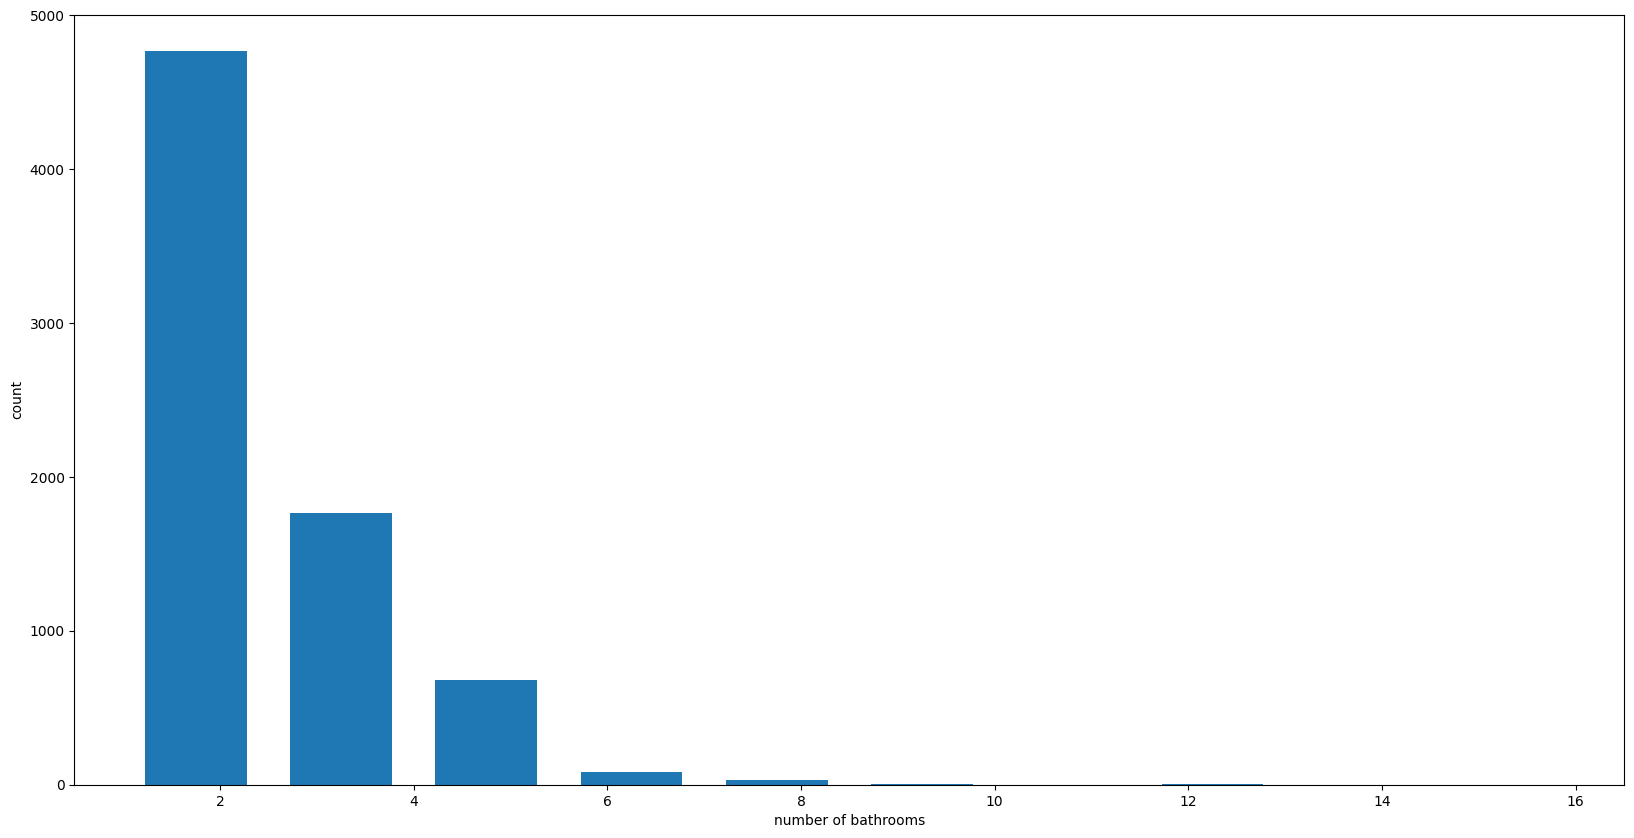

In [ ]:
plt.hist(df4.bath, rwidth= 0.7)
plt.xlabel("number of bathrooms")
plt.ylabel("count")

In [ ]:
df4[df4.bath > df4.BHK + 2 ]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
df5 = df4[df4.bath  < df4.BHK + 2 ]
df5.shape

(7251, 7)

In [ ]:
df5 =df5.drop(['size', 'price_per_sqft'], axis = "columns")
df5.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


BUild Ml model

In [ ]:
dummies = pd.get_dummies(df5.location)

In [ ]:
df6 = pd.concat([df5, dummies.drop('other',axis= "columns")], axis="columns")

In [ ]:
df6.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df6 = df6.drop('location', axis = "columns")

In [ ]:
X = df6.drop('price', axis="columns")
y = df6.price

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression().fit(X_train, y_train)
lr_clf.score(X_test, y_test)
lr_clf.predict(X_test)

array([70.47896311, 33.09312356, 36.00433051, ..., 29.45805298,
       58.43306285, 68.60105208])

Using kfold cross validation


In [ ]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)
cross_val_score(LinearRegression(), X, y , cv = cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

Grid search cv

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def findBestModel(X, y) :
    algos = {
        'linear_regression':{
            'model' :LinearRegression(), 
            'params': {
                'fit_intercept' : [True, False]
            } 
        },
        'lasso':{
            'model' :Lasso(), 
            'params': {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            } 
        } ,
        'decision_tree':{
            'model' :DecisionTreeRegressor(), 
            'params': {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            } 
        }
    }
    scores = [] 
    cv =ShuffleSplit(n_splits= 5, test_size=0.2, random_state=0)
    for algo_name , conf  in algos.items():
        gs = GridSearchCV(conf['model'], conf['params'], cv = cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name, 
            'best_score' : gs.best_score_, 
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
findBestModel(X, y)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 177, i

,model,best_score,best_params
0,linear_regression,0.819001,{'fit_intercept': False}
1,lasso,0.687476,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.723282,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [ ]:
X

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def pricePredict(location , sqft, bath , bhk):
    loc_index = np.where(X.columns == location)[0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0: 
        x[loc_index] = 1
    return lr_clf.predict([x])[0]
pricePredict('1st Block Jayanagar', 1000, 2,3)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


200.2191013036854

EXPORT MODEL

In [ ]:
import pickle 
with open('banglore_home_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open ('columns.json', 'w') as f: 
    f.write(json.dumps(columns))